#### **Custom Skeletonization and Thinning Algorithms**

In [4]:
import cv2
import numpy as np
import os

def load_binary_images(directory):
    """Load binary images from the specified directory."""
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Ensure the image is binary
                _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
                images.append((filename, binary_img))
    return images

def zhang_suen_thinning(image):
    """Perform Zhang-Suen thinning on a binary image."""
    image = image // 255  # Normalize to 0 and 1
    changed = True
    while changed:
        changed = False
        # Step 1
        marker = np.zeros_like(image)
        for i in range(1, image.shape[0] - 1):
            for j in range(1, image.shape[1] - 1):
                p = image[i, j]
                if p == 1:
                    neighbors = [
                        image[i - 1, j], image[i - 1, j + 1], image[i, j + 1],
                        image[i + 1, j + 1], image[i + 1, j], image[i + 1, j - 1],
                        image[i, j - 1], image[i - 1, j - 1]
                    ]
                    transitions = sum((neighbors[k] == 0 and neighbors[(k + 1) % 8] == 1) for k in range(8))
                    sum_neighbors = sum(neighbors)
                    if (
                        2 <= sum_neighbors <= 6
                        and transitions == 1
                        and neighbors[0] * neighbors[2] * neighbors[4] == 0
                        and neighbors[2] * neighbors[4] * neighbors[6] == 0
                    ):
                        marker[i, j] = 1
                        changed = True
        image = image - marker
        # Step 2
        marker = np.zeros_like(image)
        for i in range(1, image.shape[0] - 1):
            for j in range(1, image.shape[1] - 1):
                p = image[i, j]
                if p == 1:
                    neighbors = [
                        image[i - 1, j], image[i - 1, j + 1], image[i, j + 1],
                        image[i + 1, j + 1], image[i + 1, j], image[i + 1, j - 1],
                        image[i, j - 1], image[i - 1, j - 1]
                    ]
                    transitions = sum((neighbors[k] == 0 and neighbors[(k + 1) % 8] == 1) for k in range(8))
                    sum_neighbors = sum(neighbors)
                    if (
                        2 <= sum_neighbors <= 6
                        and transitions == 1
                        and neighbors[0] * neighbors[2] * neighbors[6] == 0
                        and neighbors[0] * neighbors[4] * neighbors[6] == 0
                    ):
                        marker[i, j] = 1
                        changed = True
        image = image - marker
    return (image * 255).astype(np.uint8)

def skeletonization(image):
    """Perform skeletonization by iterative boundary removal."""
    skeleton = np.zeros_like(image)
    image = image // 255  # Normalize to 0 and 1
    while True:
        eroded = cv2.erode(image, np.ones((3, 3), np.uint8), iterations=1)
        temp = cv2.dilate(eroded, np.ones((3, 3), np.uint8), iterations=1)
        skeleton += image - temp
        image = eroded
        if cv2.countNonZero(image) == 0:
            break
    return (skeleton * 255).astype(np.uint8)

# Main script
if __name__ == "__main__":
    input_dir = os.getcwd()  # Current directory
    output_dir_thinning = os.path.join(input_dir, "thinning_results")
    output_dir_skeletonization = os.path.join(input_dir, "skeleton_results")
    
    os.makedirs(output_dir_thinning, exist_ok=True)
    os.makedirs(output_dir_skeletonization, exist_ok=True)
    
    images = load_binary_images(input_dir)
    
    for filename, binary_image in images:
        # Thinning
        thinned_image = zhang_suen_thinning(binary_image)
        thinning_output_path = os.path.join(output_dir_thinning, f"thinned_{filename}")
        cv2.imwrite(thinning_output_path, thinned_image)
        
        # Skeletonization
        skeleton_image = skeletonization(binary_image)
        skeleton_output_path = os.path.join(output_dir_skeletonization, f"skeleton_{filename}")
        cv2.imwrite(skeleton_output_path, skeleton_image)
        
        print(f"Processed {filename}: Thinning -> {thinning_output_path}, Skeletonization -> {skeleton_output_path}")
    
    print("All images processed.")


Processed binary_image-1.jpg: Thinning -> e:\Semester-7\DIP-Lab\Lab-10\thinning_results\thinned_binary_image-1.jpg, Skeletonization -> e:\Semester-7\DIP-Lab\Lab-10\skeleton_results\skeleton_binary_image-1.jpg
Processed binary_image-10.jpeg: Thinning -> e:\Semester-7\DIP-Lab\Lab-10\thinning_results\thinned_binary_image-10.jpeg, Skeletonization -> e:\Semester-7\DIP-Lab\Lab-10\skeleton_results\skeleton_binary_image-10.jpeg
Processed binary_image-2.jpg: Thinning -> e:\Semester-7\DIP-Lab\Lab-10\thinning_results\thinned_binary_image-2.jpg, Skeletonization -> e:\Semester-7\DIP-Lab\Lab-10\skeleton_results\skeleton_binary_image-2.jpg
Processed binary_image-3.jpeg: Thinning -> e:\Semester-7\DIP-Lab\Lab-10\thinning_results\thinned_binary_image-3.jpeg, Skeletonization -> e:\Semester-7\DIP-Lab\Lab-10\skeleton_results\skeleton_binary_image-3.jpeg
Processed binary_image-4.jpeg: Thinning -> e:\Semester-7\DIP-Lab\Lab-10\thinning_results\thinned_binary_image-4.jpeg, Skeletonization -> e:\Semester-7\DIP-

#### **Plotting the Images**

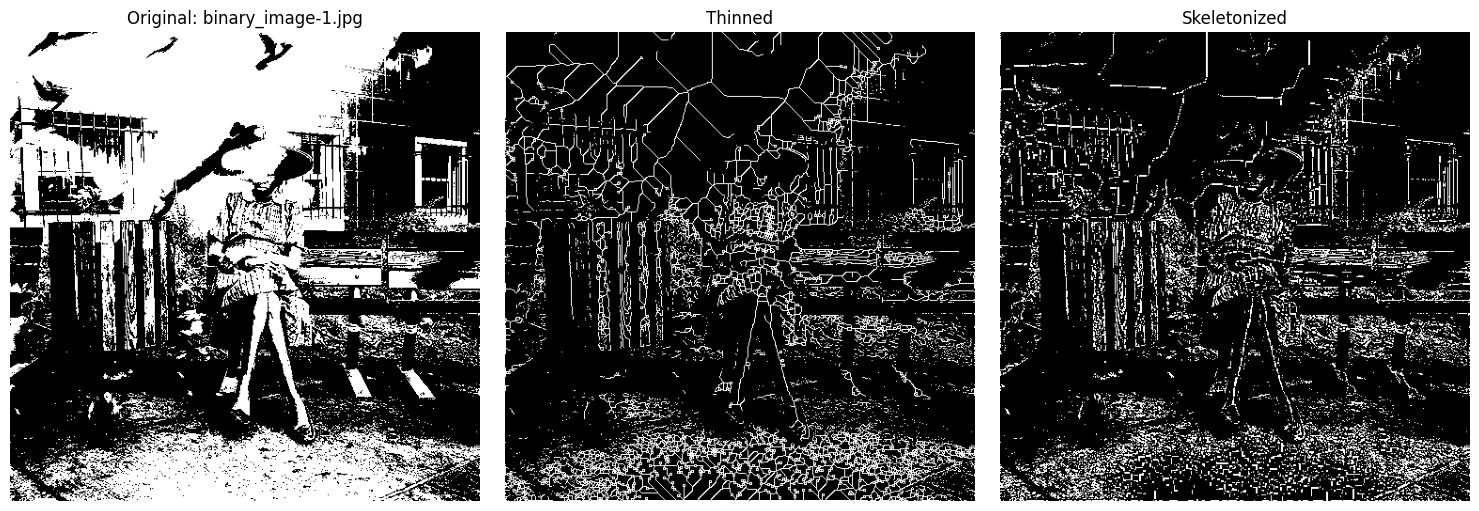

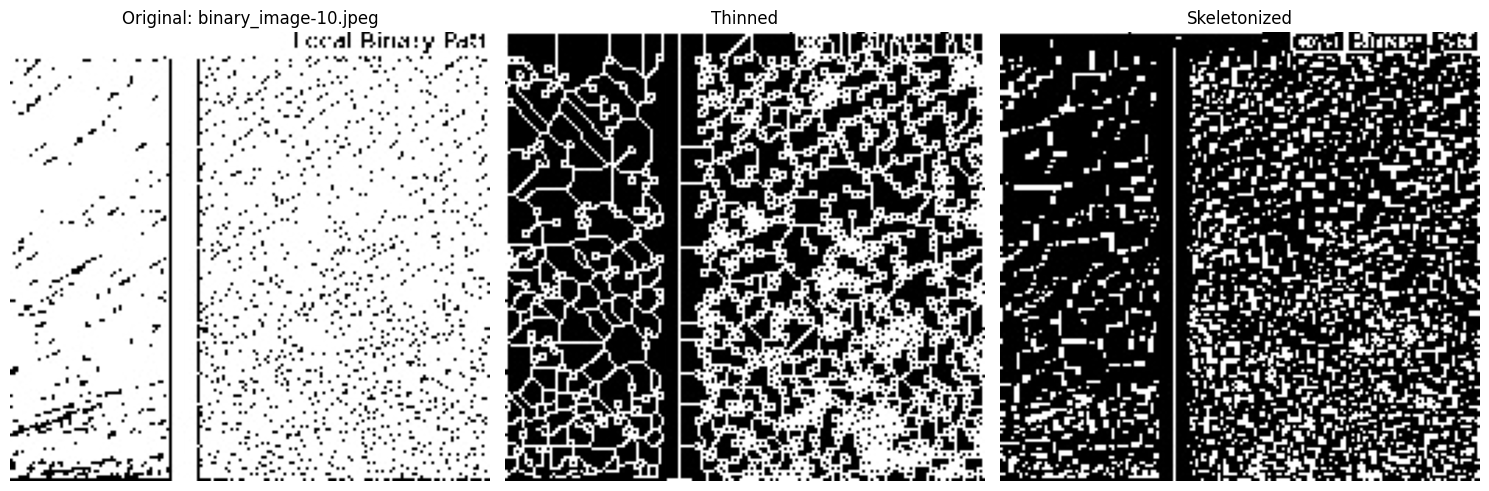

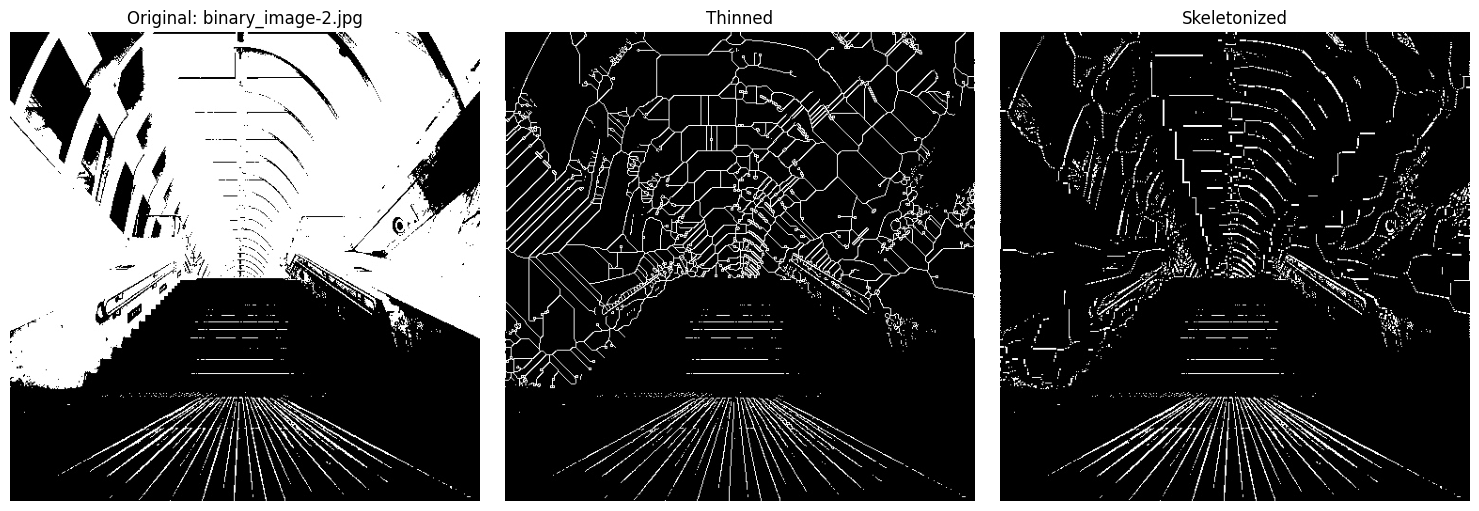

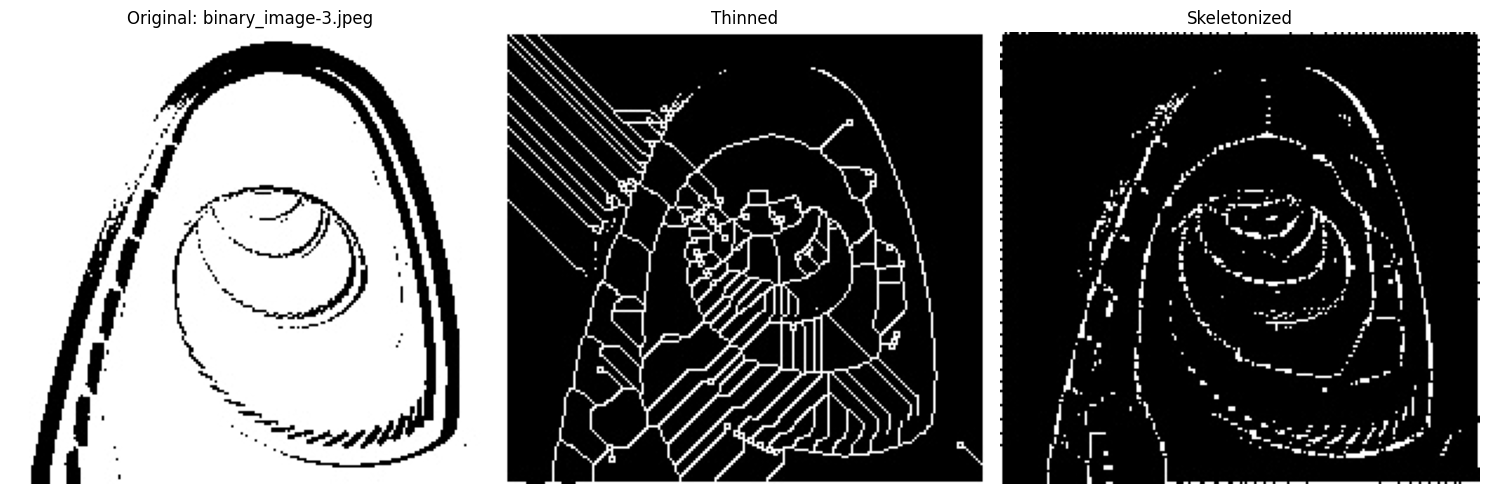

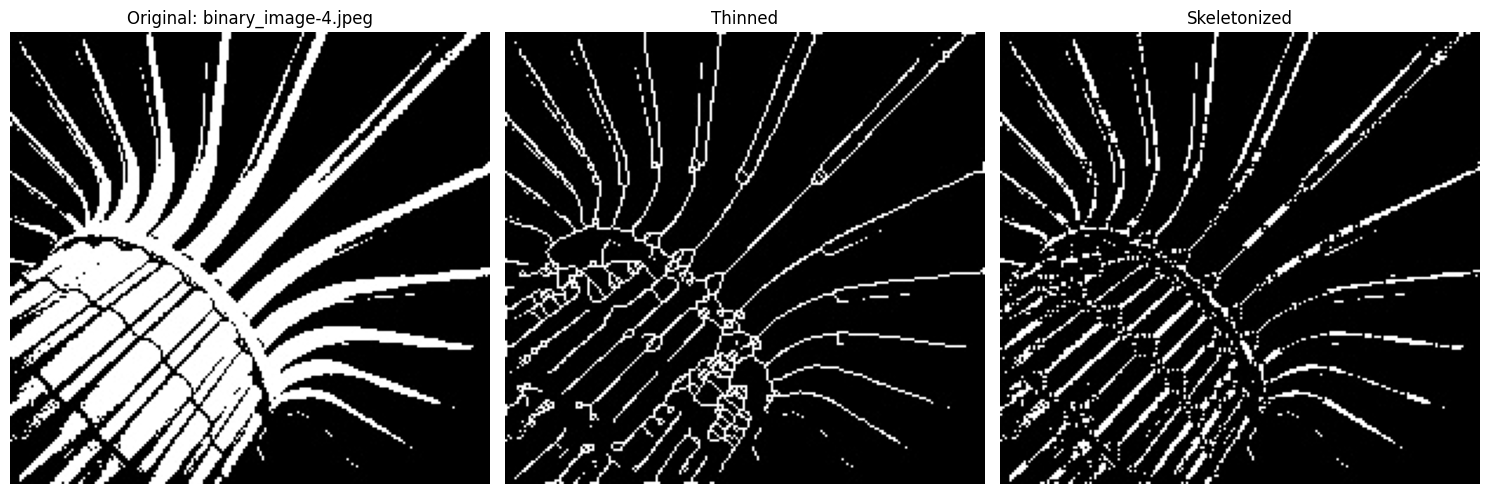

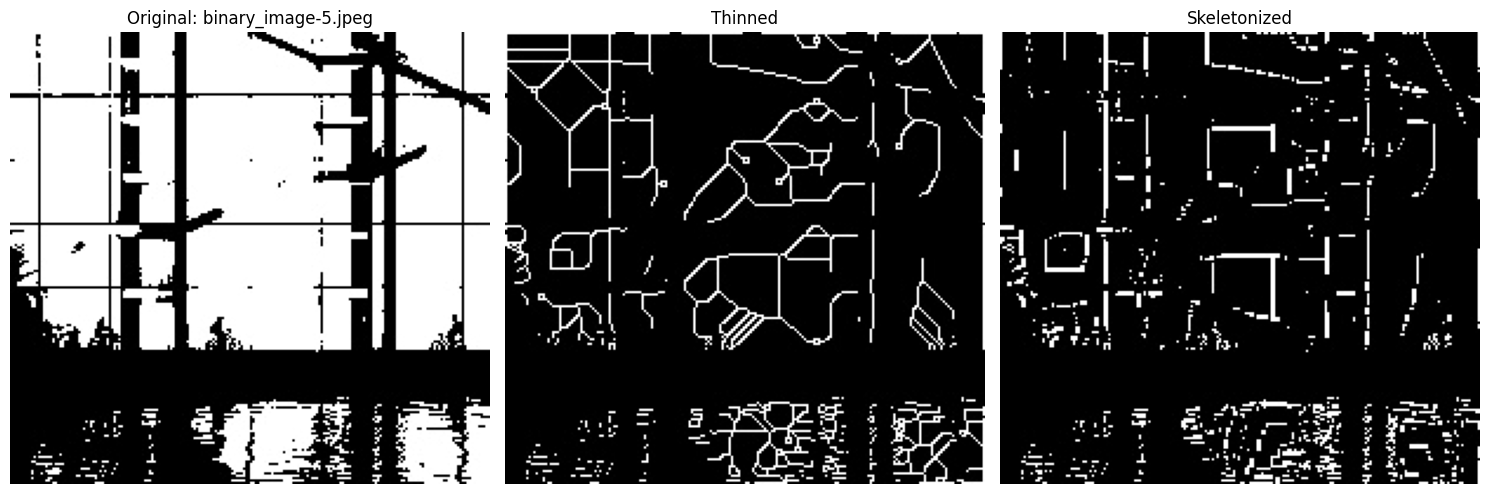

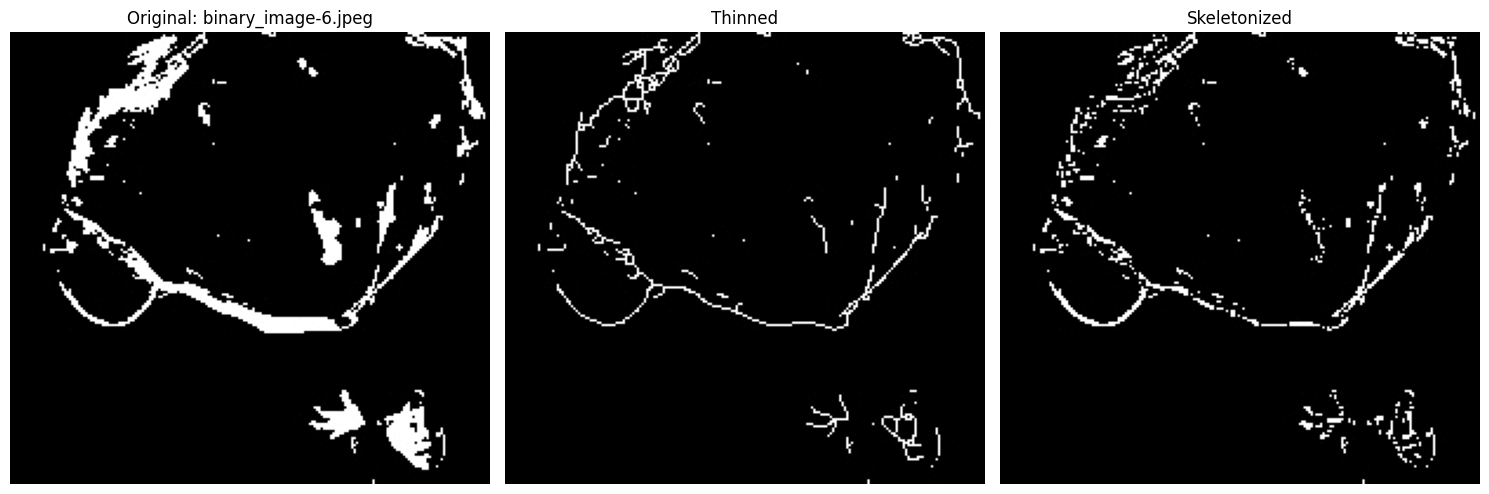

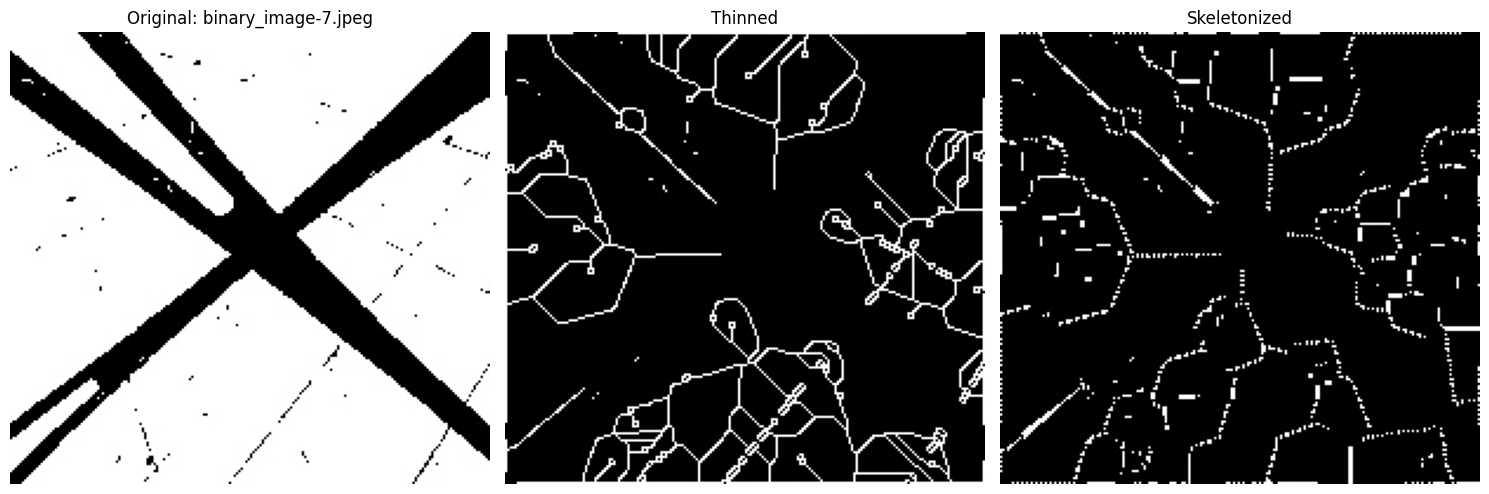

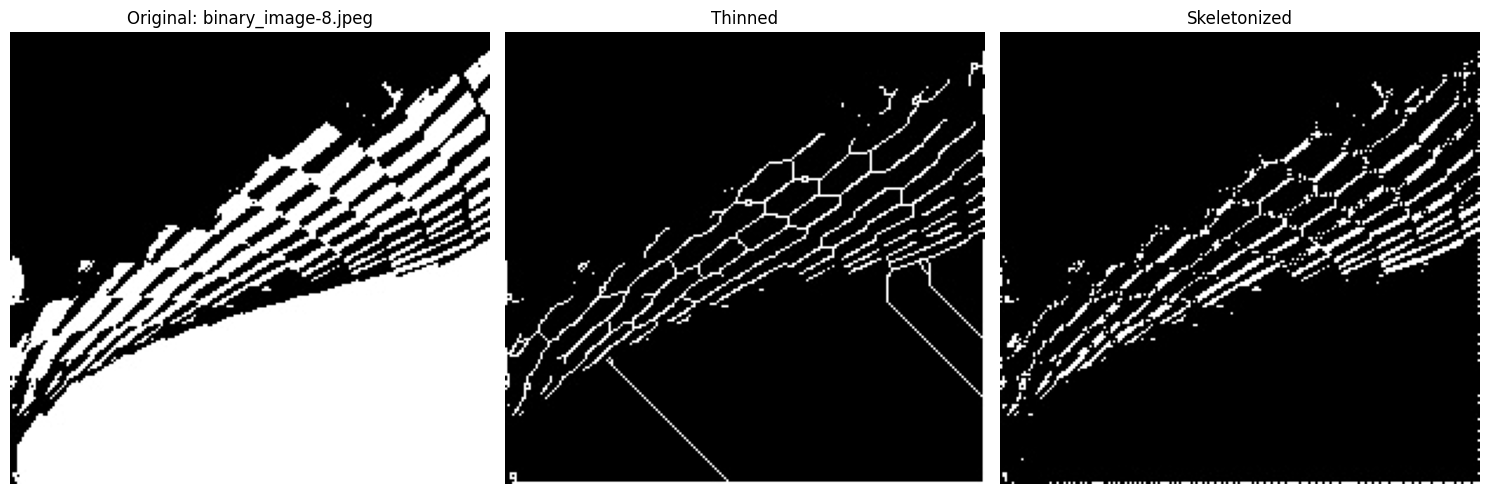

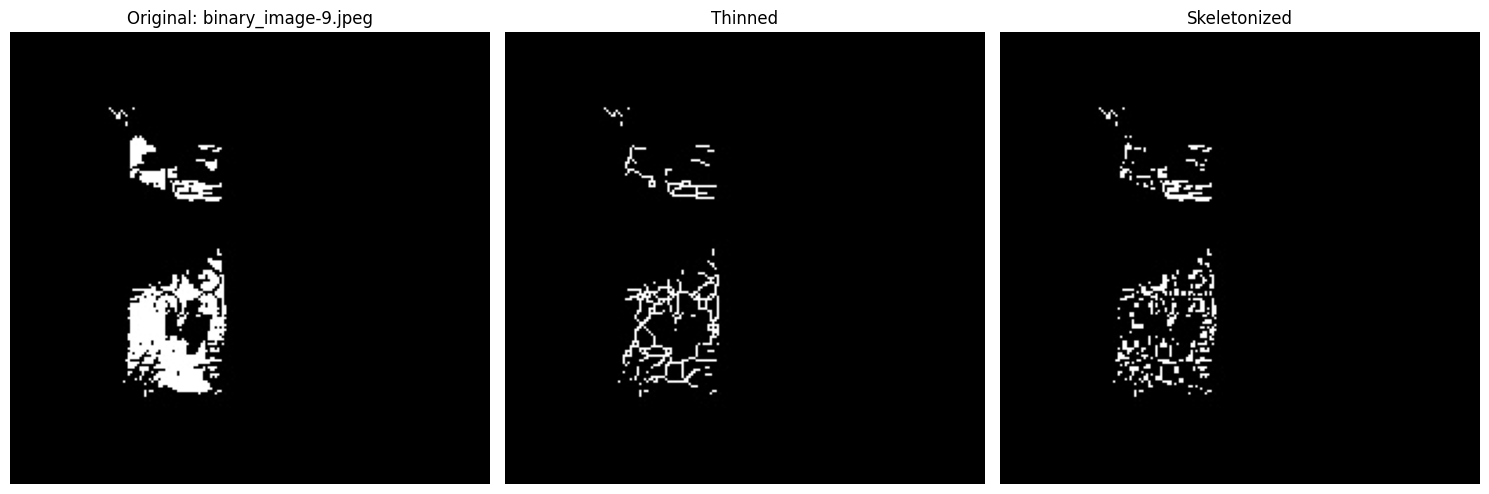

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

def load_images_with_results(original_dir, thinning_dir, skeleton_dir):
    """Load original, thinned, and skeletonized images for comparison."""
    images = []
    for filename in os.listdir(original_dir):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            original_path = os.path.join(original_dir, filename)
            thinning_path = os.path.join(thinning_dir, f"thinned_{filename}")
            skeleton_path = os.path.join(skeleton_dir, f"skeleton_{filename}")
            
            original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
            thinned = cv2.imread(thinning_path, cv2.IMREAD_GRAYSCALE)
            skeleton = cv2.imread(skeleton_path, cv2.IMREAD_GRAYSCALE)
            
            if original is not None and thinned is not None and skeleton is not None:
                images.append((filename, original, thinned, skeleton))
    return images

def plot_images(images):
    """Plot the original, thinned, and skeletonized images side by side."""
    for filename, original, thinned, skeleton in images:
        plt.figure(figsize=(15, 5))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(original, cmap="gray")
        plt.title(f"Original: {filename}")
        plt.axis("off")
        
        # Thinned image
        plt.subplot(1, 3, 2)
        plt.imshow(thinned, cmap="gray")
        plt.title("Thinned")
        plt.axis("off")
        
        # Skeletonized image
        plt.subplot(1, 3, 3)
        plt.imshow(skeleton, cmap="gray")
        plt.title("Skeletonized")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()

# Main script
if __name__ == "__main__":
    input_dir = os.getcwd()  # Current directory
    thinning_dir = os.path.join(input_dir, "thinning_results")
    skeleton_dir = os.path.join(input_dir, "skeleton_results")
    
    images = load_images_with_results(input_dir, thinning_dir, skeleton_dir)
    plot_images(images)


#### **Builtin Skeletonization and Thinning**

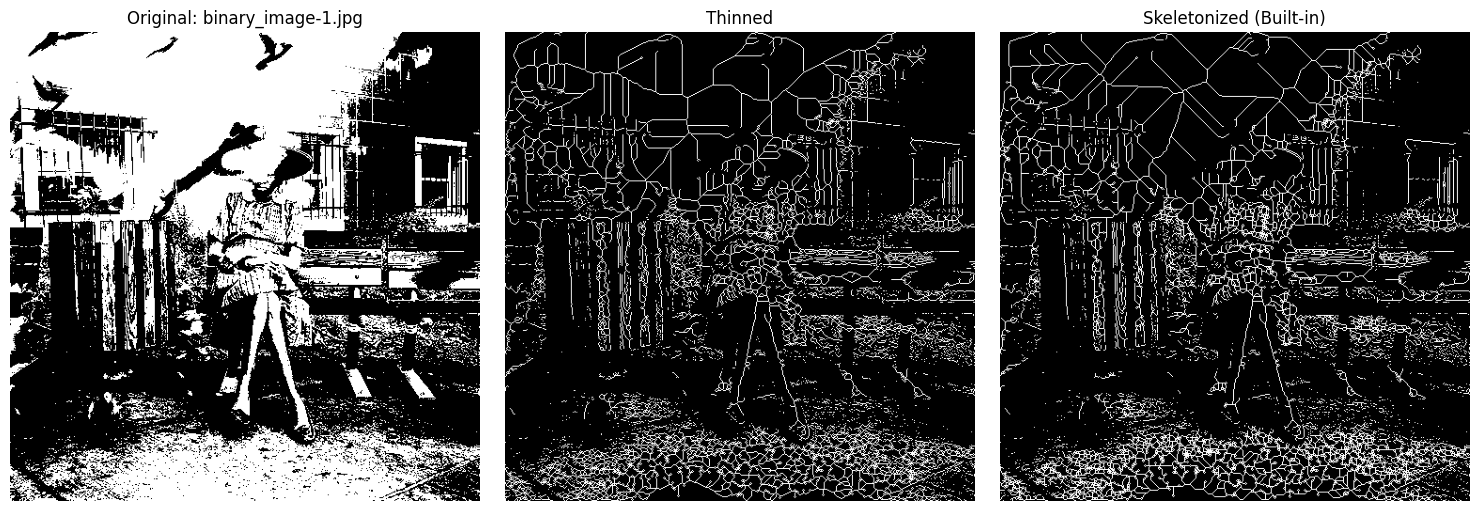

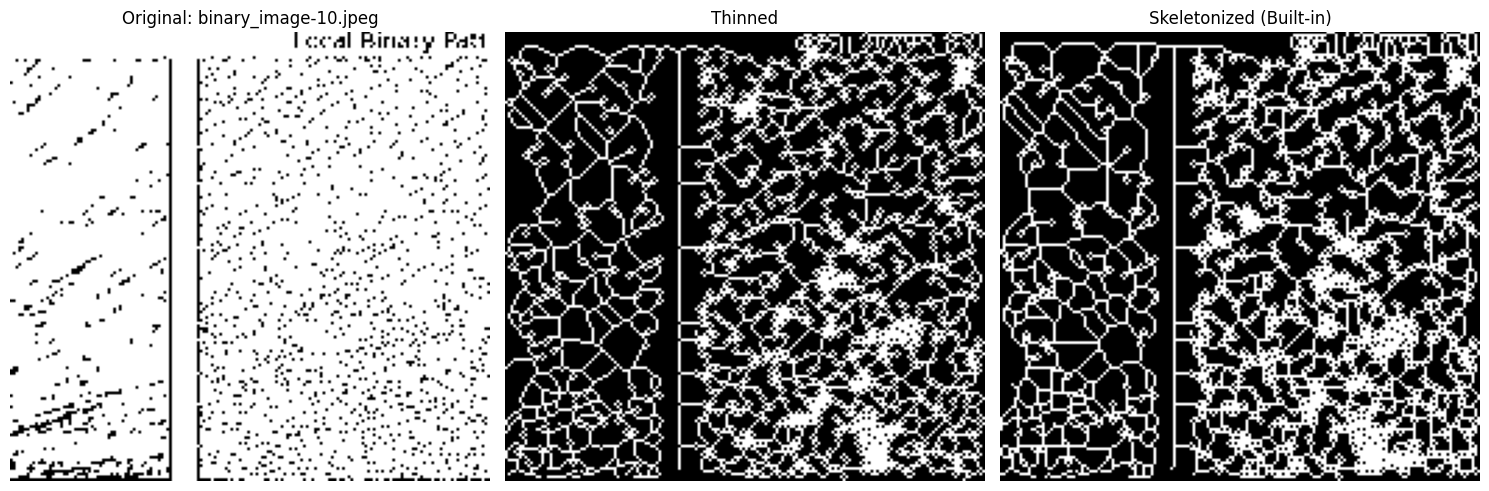

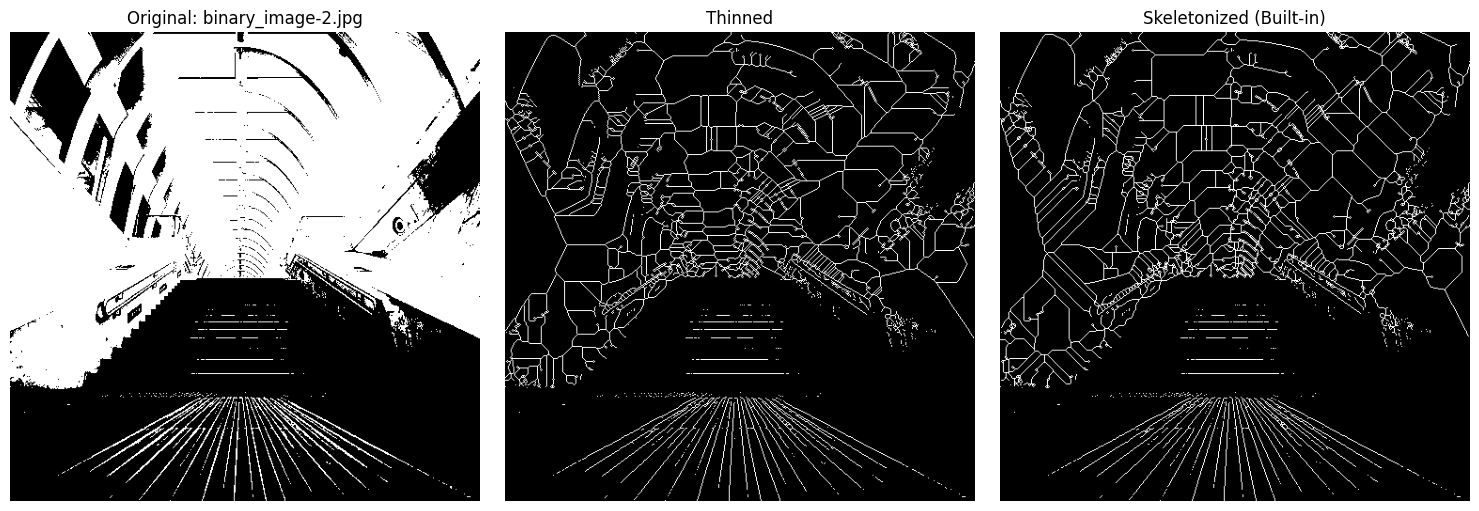

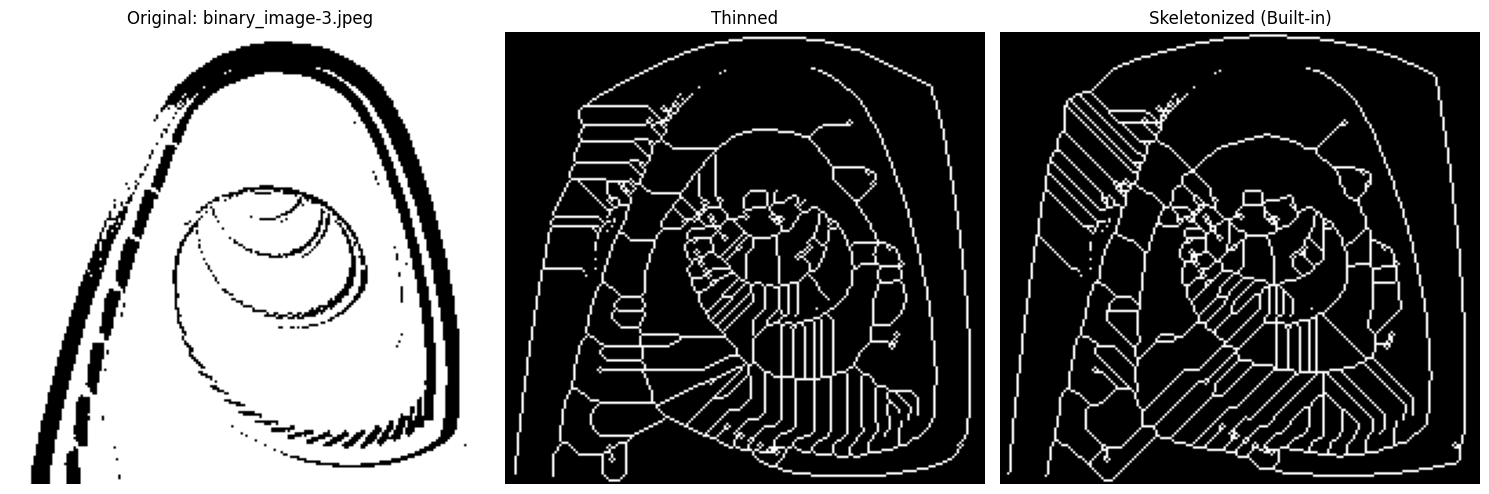

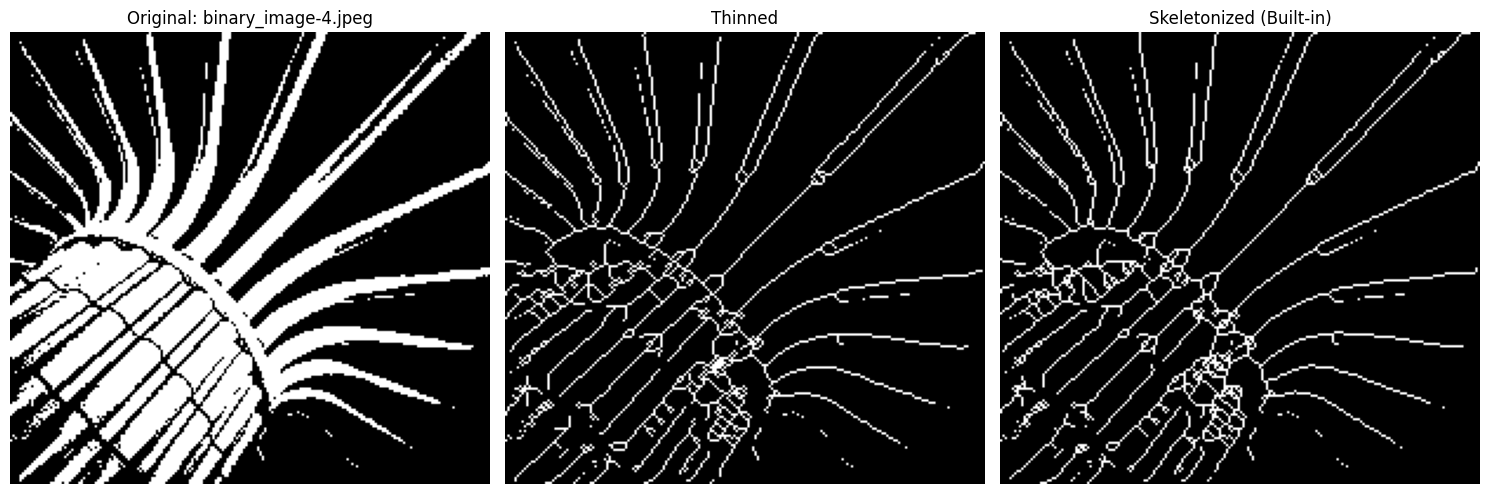

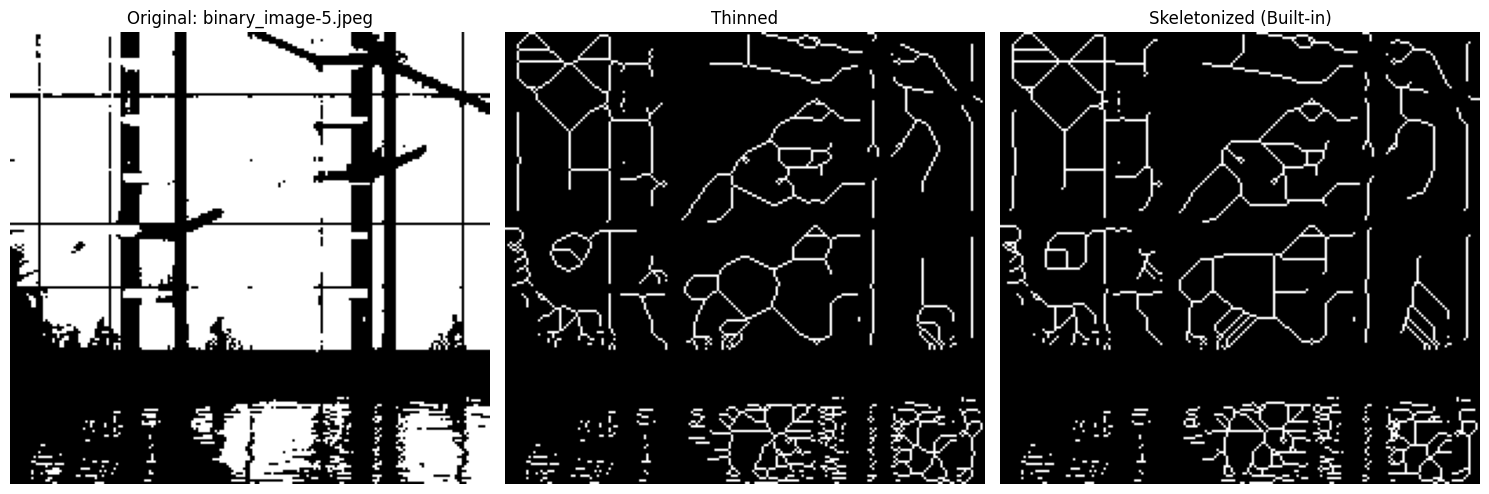

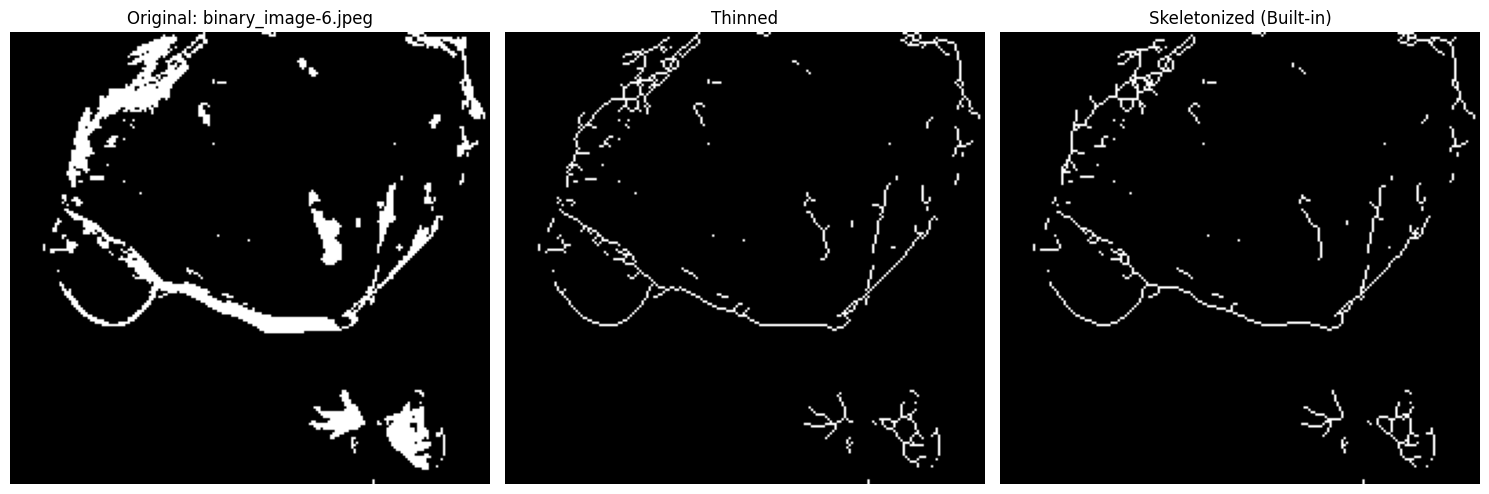

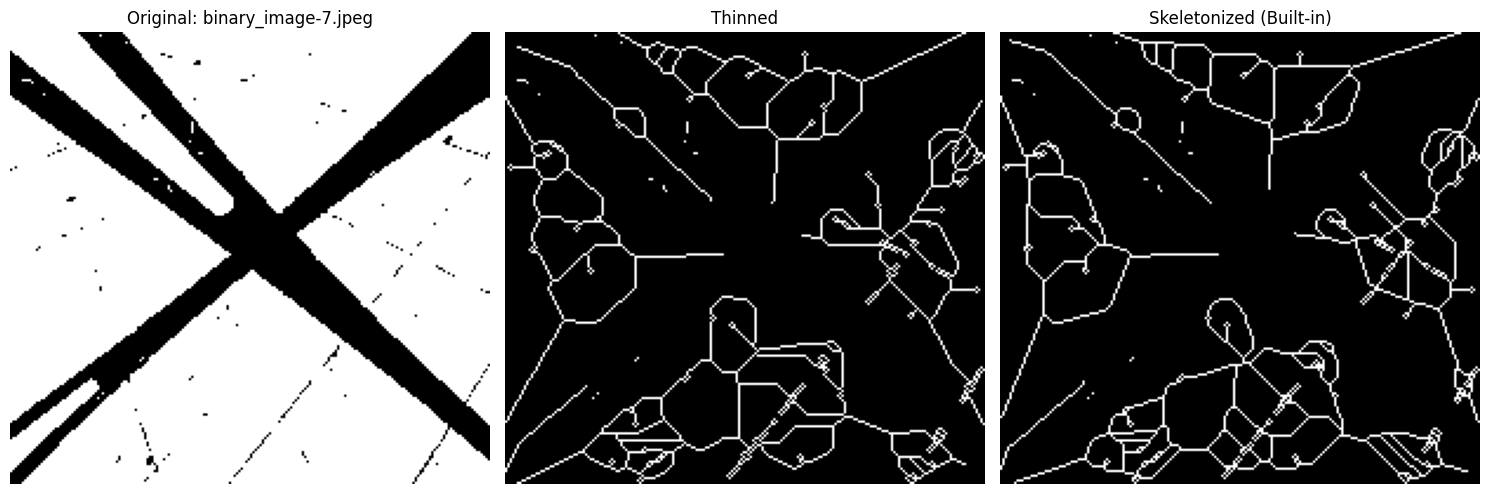

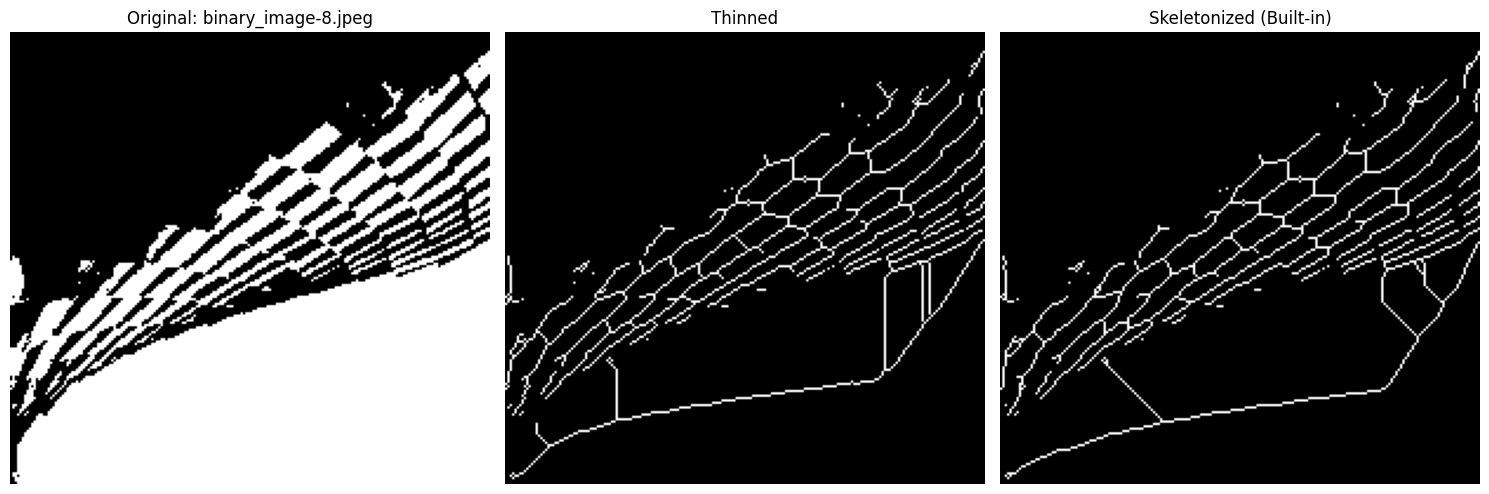

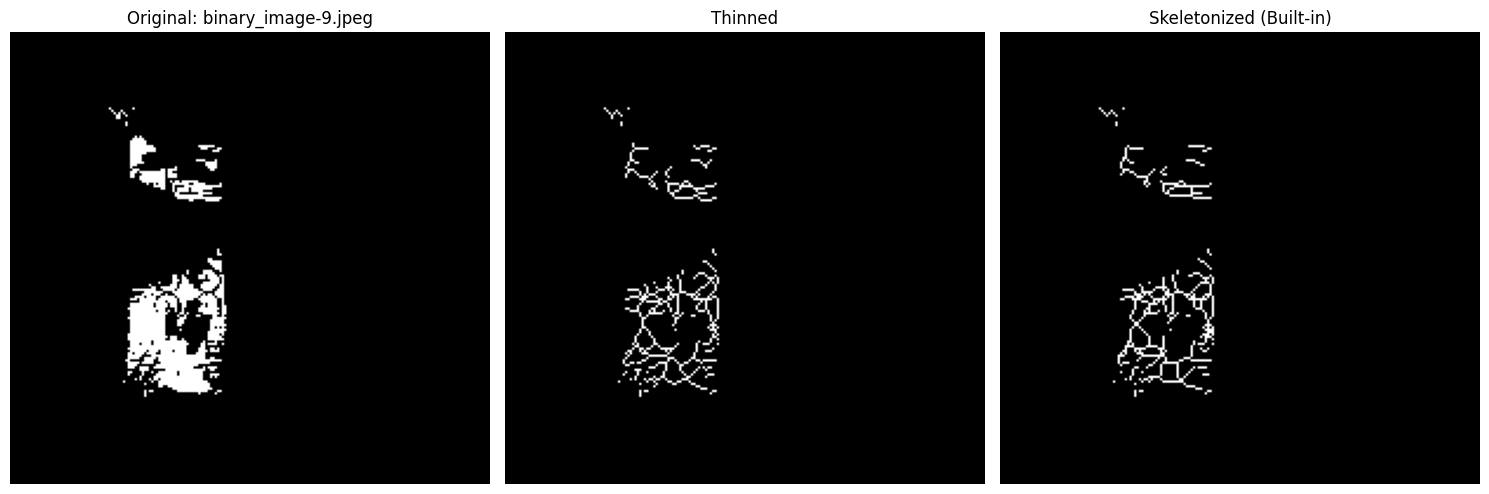

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize, thin

def load_binary_images(directory):
    """Load binary images from the specified directory."""
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Ensure the image is binary
                _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
                images.append((filename, binary_img))
    return images

def apply_builtin_algorithms(binary_image):
    """Apply built-in thinning and skeletonization algorithms."""
    # Normalize the binary image to 0-1 for scikit-image functions
    binary_norm = binary_image // 255

    # Skeletonization
    skeleton = skeletonize(binary_norm)  # Built-in skeletonization (0-1 output)
    skeleton = (skeleton * 255).astype(np.uint8)  # Scale back to 0-255

    # Thinning
    thinned = thin(binary_norm)  # Built-in thinning (0-1 output)
    thinned = (thinned * 255).astype(np.uint8)  # Scale back to 0-255

    return thinned, skeleton

def plot_images_with_builtin(original_images):
    """Plot the original, thinned, and skeletonized images side by side."""
    for filename, binary_image in original_images:
        thinned_image, skeleton_image = apply_builtin_algorithms(binary_image)
        
        plt.figure(figsize=(15, 5))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(binary_image, cmap="gray")
        plt.title(f"Original: {filename}")
        plt.axis("off")
        
        # Thinned image
        plt.subplot(1, 3, 2)
        plt.imshow(thinned_image, cmap="gray")
        plt.title("Thinned")
        plt.axis("off")
        
        # Skeletonized image
        plt.subplot(1, 3, 3)
        plt.imshow(skeleton_image, cmap="gray")
        plt.title("Skeletonized (Built-in)")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()

# Main script
if __name__ == "__main__":
    input_dir = os.getcwd()  # Current directory

    images = load_binary_images(input_dir)
    plot_images_with_builtin(images)


#### **Comparison of Custom Thinning and Skeletonization vs. Built-in Algorithms**

In comparing the results of the custom thinning and skeletonization algorithms with the built-in `skimage` functions, several noteworthy differences emerge. Both the **thinning** and **skeletonization** algorithms from `skimage` produce nearly identical outputs, with only subtle distinctions in the final appearance. However, the custom implementation exhibits some variations in its results, particularly in the thickness and continuity of the lines, as well as the overall visual consistency.

##### **1. Line Thickness and Continuity:**
- **Custom Implementation**: The thinning process in the custom algorithm sometimes results in lines that are **thinner** than those generated by the skeletonization algorithm. This discrepancy may occur due to differences in the pixel removal criteria during the iterative process. Additionally, some lines exhibit **gaps**, where pixels disappear entirely, which can create breakpoints or discontinuities in the lines. Although these occurrences are minimal, they are still noticeable, particularly in images with intricate patterns.
- **Built-in Functions (`thin` and `skeletonize`)**: Both the thinning and skeletonization algorithms in `skimage` produce **consistent line thickness** across the entire image. The lines remain uniformly thin, with no gaps, ensuring that the structure of the shapes is preserved without interruption. The skeletonization output is particularly clean, preserving the exact medial axis of the shapes without losing detail.

##### **2. Line Darkness:**
- **Custom Implementation**: In some images, the lines generated by the custom thinning algorithm appear slightly **darker** than those produced by the skeletonization method. This could be a result of the differences in pixel handling during the iterative thinning process, where certain pixels may retain higher intensity due to less aggressive pruning.
- **Built-in Functions**: Both the thinning and skeletonization methods in `skimage` produce lines that are consistently lighter and cleaner, as the built-in algorithms tend to prioritize precision in pixel removal without affecting the overall brightness.

#### **Reasoning Behind Differences:**
The differences in line thickness, continuity, and darkness between the custom and built-in algorithms can be attributed to several factors:

- **Thinning vs. Skeletonization**: Thinning is an iterative process where pixels are removed layer by layer, aiming to reduce the shape to its minimal form while maintaining connectivity. However, this approach may sometimes result in thinner lines and occasional gaps if the algorithm doesn't strictly enforce connectivity rules. On the other hand, skeletonization focuses on maintaining the core structure of the shape, generating a cleaner, more consistent line without gaps.
  
- **Pixel Removal Criteria**: In the custom thinning algorithm, the criteria for removing pixels might not be as stringent or optimized as in the built-in functions. As a result, some regions may be over-pruned, leading to thinner lines or discontinuities. The built-in algorithms in `skimage` use well-established, highly refined techniques that ensure smoother, more stable thinning and skeletonization results.

- **Post-Processing and Normalization**: Built-in algorithms like `thin` and `skeletonize` may include additional post-processing steps that help smooth out variations in pixel intensity, leading to uniform line brightness and avoiding the darker areas seen in custom implementations.

---